<a href="https://colab.research.google.com/github/suresh-venkate/Code_Repositories/blob/main/Deep_Learning/Experiments/Cyclic_LR_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/bckenstler/CLR/master/clr_callback.py

--2021-07-27 08:03:31--  https://raw.githubusercontent.com/bckenstler/CLR/master/clr_callback.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5398 (5.3K) [text/plain]
Saving to: ‘clr_callback.py’

clr_callback.py     100%[===================>]   5.27K  --.-KB/s    in 0s      

2021-07-27 08:03:31 (74.8 MB/s) - ‘clr_callback.py’ saved [5398/5398]



In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from clr_callback import *
from keras.optimizers import *
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

In [9]:
inp = Input(shape=(15,))                
x = Dense(10, activation='relu')(inp)
x = Dense(1, activation='sigmoid')(x)
model = Model(inp, x)
model.compile(optimizer=SGD(0.1), loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
X = np.random.rand(2000000,15)
Y = np.random.randint(0,2,size=2000000)
print(X.shape)
print(Y.shape)

(2000000, 15)
(2000000,)


In [28]:
clr_triangular = CyclicLR(mode='triangular')
hist = model.fit(X, Y, batch_size=2000, epochs=3, callbacks=[clr_triangular], verbose=2)

Epoch 1/3
1000/1000 - 2s - loss: 0.6938 - accuracy: 0.5005
Epoch 2/3
1000/1000 - 2s - loss: 0.6937 - accuracy: 0.5005
Epoch 3/3
1000/1000 - 2s - loss: 0.6937 - accuracy: 0.5005


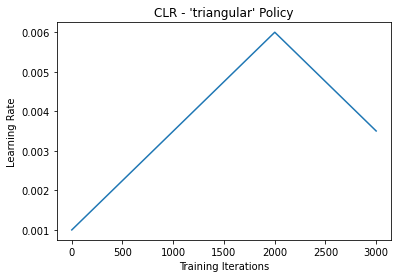

In [29]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'triangular' Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])